# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

https://github.com/eddierose42/individual-summative



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("attendance_anonymised.csv")

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [39]:
print("DATAFRAME OVERVIEW:")
display(df.head(3))

print("DATAFRAME INFO, INCLUDING DATA TYPES AND NULL VALUES:\n")
print(df.info())

print("\nDESCRIPTIVE STATISTCS:")
display(df.describe().round(1))


DATAFRAME OVERVIEW:


,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A


DATAFRAME INFO, INCLUDING DATA TYPES AND NULL VALUES:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14 

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.0,17053.0,17053.0,17053.0,17053.0,17053.0,17053.0,17053.0
mean,258.2,1252.7,2023.9,495.8,504.8,572.4,0.7,0.7
std,146.9,530.6,0.8,292.0,275.2,313.9,0.5,0.4
min,1.0,4.0,2023.0,1.0,7.0,0.0,0.0,0.0
25%,146.0,840.0,2023.0,223.0,267.0,297.0,0.0,0.0
50%,265.0,1306.0,2024.0,515.0,504.0,574.0,1.0,1.0
75%,384.0,1749.0,2025.0,788.0,733.0,839.0,1.0,1.0
max,498.0,1945.0,2025.0,984.0,984.0,1124.0,1.0,1.0


<span style="color:orange">

My printouts above give an overview of what the dataset looks like, and then information about data types and descriptive statistics for the integer variables (which, as we can see from the variable names, aren't very helpful, as most variables are ID codes / identifiers for different things). If we read the dataframe info printout closely we can also see that columns 11 (Has Attended) and 14 (Attendance Code) both contain 15 null values. Given that much of the data are objects we will have to do some data cleaning, e.g. changing the Date column to a datetime object.

</span>

3. Drop the `Planned End Date` column.


In [40]:
df.drop("Planned End Date", axis=1, inplace=True)

4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [41]:
mapping = {
    "Person Code": "Person Code",
    "Unit Instance Code": "Module Code",
    "Calocc Code": "Year",
    "Long Description": "Module Name",
    "Register Event ID": "Event ID",
    "Register Event Slot ID": "Event Slot ID",
    "Planned Start Date": "Date",
    "is Positive": "Has Attended",
    "Postive Marks": "Attended",
    "Negative Marks": "NotAttended",
    "Usage Code": "Attendance Code"
}

df.rename(mapping, axis=1, inplace=True) # this makes the dataset much easier to understand and work with

5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [42]:
df["Date"] = pd.to_datetime(df["Date"]) # this allows the pandas to be able to calculate with dates and plot over time

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



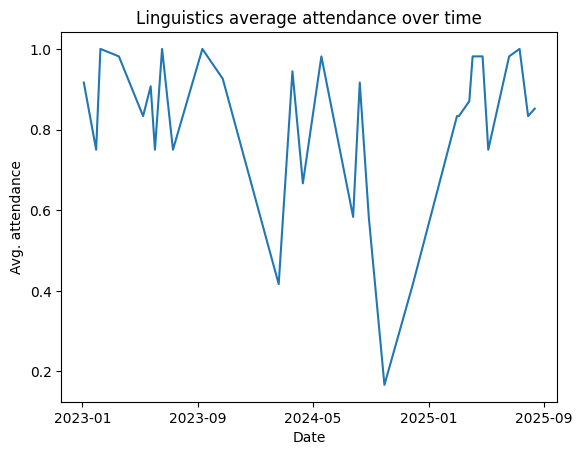

In [43]:
module_choice = "Linguistics"

# filter data using groupby function and then plot it
data = df[df["Module Name"] == module_choice][["Date", "Attended"]].groupby("Date").mean()
plt.plot(data);

# adjust labels on the x-axis so the graph is readable
values, labels = plt.xticks()
new = [[], []]
for i in range(0, len(values), 2):
    new[0].append(values[i])
    new[1].append(labels[i])
plt.xticks(new[0], new[1]);

# add labels and title to graph
plt.xlabel("Date")
plt.ylabel("Avg. attendance")
plt.title("{} average attendance over time".format(module_choice))
plt.show()

<span style="color:orange">

This shows us that the average attendance per class for the linguistics module varies significantly over time. In particular, we can see that there was a very poorly attended class in late 2024, and another in early 2024. The attendance rate for the rest of the classes varied between 0.6 and 1. 

</span>

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [44]:
# filter data by student and take average
data = df[["Person Code", "Attended"]].groupby("Person Code").mean()["Attended"]

# calculate z-scores
zscores = (data - data.mean()) / data.std()

# add data values to dataframe
df["Student Overall Attendance"] = data[df["Person Code"].values].values
df["Standardised Student Overall Attendance"] = zscores[df["Person Code"].values].values

df.head(3)

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,Student Overall Attendance,Standardised Student Overall Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,0.875000,0.503163
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,0.875000,0.503163
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,0.216216,-2.553278


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [45]:
# group by module and then show mean and standard deviation
df_compare = df[["Module Name", "Attended"]].groupby("Module Name")["Attended"]
df_compare.describe()[["mean", "std"]].round(2)

,mean,std
Module Name,,
Algorithms,0.74,0.44
Arabic,0.75,0.43
Arts & Crafts,0.61,0.49
Biology,0.62,0.49
Biomedical Engineering,0.65,0.48
Business Intelligence,0.78,0.42
Chemistry,0.68,0.47
Cloud Computing,0.84,0.37
Creative Writing,0.97,0.18


2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


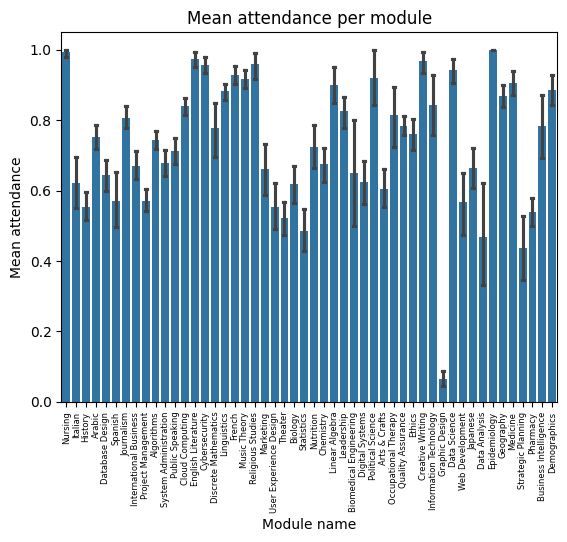

In [46]:
sns.barplot(x="Module Name", y="Attended", data=df, capsize=0.2) # 95% confidence interval error bars automatically added by seaborn

# add labels, title etc
plt.xlabel("Module name")
plt.ylabel("Mean attendance")
plt.xticks(fontsize=6, rotation=90)
plt.title("Mean attendance per module")
plt.show()

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

<span style="color:orange">

The plot shows the attendance rate for each module, which is the mean average attendance for all the classes across the module. The error bars show the range where the true attendance rate could be; as these are calculated with 95% confidence intervals, it means there is a 95% probability that the true attendance rate would fall between them if further sampling was repeated.

From the data, we can see clearly that the most poorly attended module was graphic design, and the two best attended modules were epidemology and nursing. Of these, epidemology has the smallest confidence interval.

</span>

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


CORRELATION:
Correlation coefficient: 0.683	p-value: 4.6863158878295204e-08

LINEAR REGRESSION:
R-squared: 0.466		p-value: 4.68631588782946e-08



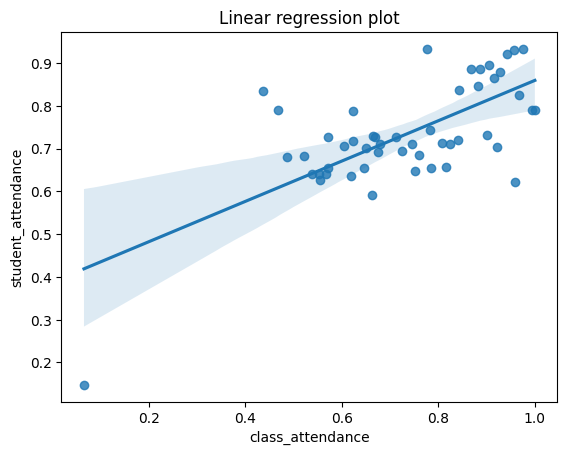

Full info from linear regression model:
                            OLS Regression Results                            
Dep. Variable:       class_attendance   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     41.93
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           4.69e-08
Time:                        17:36:47   Log-Likelihood:                 29.889
No. Observations:                  50   AIC:                            -55.78
Df Residuals:                      48   BIC:                            -51.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [56]:
import statsmodels.api as stats
import scipy.stats

# select data and rename column headings
data = df[["Module Name", "Attended", "Student Overall Attendance"]].groupby("Module Name").mean()
data.rename({"Attended": "class_attendance", "Student Overall Attendance": "student_attendance"}, axis=1, inplace=True)

## run correlation analysis
result = scipy.stats.pearsonr(x=data["class_attendance"], y=data["student_attendance"])
print("CORRELATION:\nCorrelation coefficient: {}\tp-value: {}\n".format(round(result.statistic, 3), result.pvalue, 3))

## run linear regression analysis
model = stats.formula.ols(formula = "class_attendance ~ student_attendance", data=data).fit()
print("LINEAR REGRESSION:\nR-squared: {}\t\tp-value: {}\n".format(round(model.rsquared, 3), model.pvalues["student_attendance"]))

## show linear regression plot and print full linear regression model summary
sns.regplot(x="class_attendance", y="student_attendance", data=data)
plt.title("Linear regression plot")
plt.show()

print("Full info from linear regression model:\n{}".format(model.summary()))

<span style="color:orange">

Yes the data shows that students with low overall attendance tend to attend modules that have low attendance.

Firstly we can see this because there is a statistically significant positive correlation between student attendance and class attendance (p<0.01). My correlation analysis also describes a reasonably high strength of effect (0.683).

Using a linear regression model also gives us a statistically significant result (p<0.01). It gives a coefficient of 0.9893, showing a reasonably strong effect, and an adjusted r-squared value of 0.466. This means that only ~47% of the variability in the data can be explained by the association between the two variables.

In summary, a statistically-significant relationship between the two definitely exists, but it doesn't explain all the variation in the data. There is also a difference in the strength of the effect measured by the correlation and linear analysis.

</span>

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!